## MSTICPYConfig

In [ ]:
%%writefile msticpyconfig.yaml
AzureSentinel:
  Workspaces:
    ASIHuntOMSWorkspaceV4:
      TenantId: 72f988bf-86f1-41af-91ab-2d7cd011db47
      WorkspaceId: 52b1ab41-869e-4138-9e40-2a4457f09bf0
    CyberSecuritySoc:
      TenantId: 72f988bf-86f1-41af-91ab-2d7cd011db47
      WorkspaceId: 8ecf8077-cf51-4820-aadd-14040956f35d
    Default:
      TenantId: 72f988bf-86f1-41af-91ab-2d7cd011db47
      WorkspaceId: 8ecf8077-cf51-4820-aadd-14040956f35d

## Initiializing MSTICPy

In [ ]:
# Core MSTICPy initialization for Notebooks
from msticpy.nbtools import nbinit
nbinit.init_notebook(namespace=globals());

# Load query providers (typically you'll be using just one)
qry_prov = QueryProvider("AzureSentinel")

In [ ]:
qry_prov.browse_queries()

## Connect to workspace 
```
WorkspaceConfig(workspace=WS_NAME)
```

By default, uses the Default entry

In [ ]:
qry_prov.connect(WorkspaceConfig())

In [ ]:
qry_prov.query_time

## Exploring the schema

In [ ]:
qry_prov.schema

### Table schema

In [ ]:
type(qry_prov.schema["SigninLogs"])

In [ ]:
qry_prov.schema["SigninLogs"]

In [ ]:
from collections import defaultdict
col_counts = defaultdict(int)

for table, cols in qry_prov.schema.items():
    for col in cols:
        col_counts[col] += 1
        
list(col_counts.items())[:10]

In [ ]:
col_count_ser["Category"]

<AxesSubplot:>

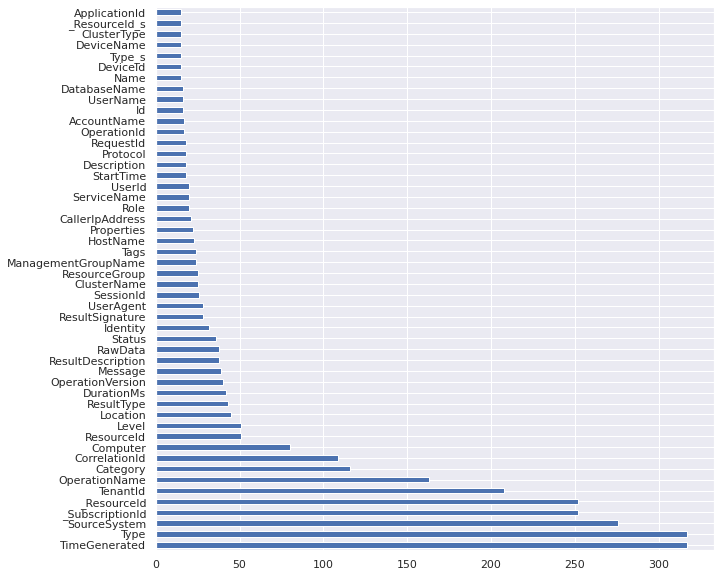

In [11]:
# Convert to pandas series
col_count_ser = pd.Series(col_counts)
col_count_ser.sort_values(ascending=False)[:50].plot.barh(figsize=(10,10))

In [12]:
col_count_df = pd.DataFrame(col_count_ser, columns=["count"])
col_count_df

,count
TenantId,208
TimeGenerated,317
Category,116
CorrelationId,109
Status,36
...,...
ConfigurationTarget_s_s,1
PropertyOperationStatus_s_s,1
AdditionalProgramInfo_s_s,1
SourceFileSize_s_d,1


In [13]:
print("num tables", len(qry_prov.schema))
col_count_df["percentage"] = col_count_df["count"] / len(qry_prov.schema)
col_count_df

num tables 317


,count,percentage
TenantId,208,0.656151
TimeGenerated,317,1.000000
Category,116,0.365931
CorrelationId,109,0.343849
Status,36,0.113565
...,...,...
ConfigurationTarget_s_s,1,0.003155
PropertyOperationStatus_s_s,1,0.003155
AdditionalProgramInfo_s_s,1,0.003155
SourceFileSize_s_d,1,0.003155


<AxesSubplot:>

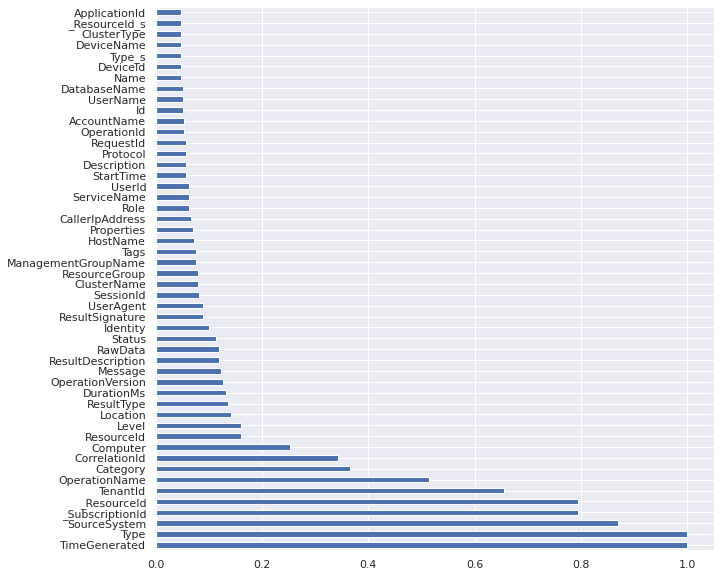

In [14]:
# col_count_df.sort_values(by="percentage", ascending=False)[:50].plot.barh(x="percentage", figsize=(10,10))

# Formatting tip
(
    col_count_df["percentage"]
    .sort_values(ascending=False)[:50]
    .plot
    .barh(figsize=(10,10))
)

In [15]:
def match_cols(col_expr):
    return col_count_ser[col_count_ser.index.str.contains(col_expr, case=False)]

match_cols("UserId")

UserId                     20
UserIdA                     1
UserIdB                     1
UserIdentityType            1
UserIdentityPrincipalid     1
UserIdentityArn             1
UserIdentityAccountId       1
UserIdentityInvokedBy       1
UserIdentityAccessKeyId     1
UserIdentityUserName        1
ActorUserId                 1
DestinationUserID           1
SourceUserID                1
SystemUserId                1
UserId_s_s                  1
UserId_s                    1
TargetUserId                1
PeerUserId                  1
dtype: int64

In [16]:
def in_tables(col):
    return [table for table, cols in qry_prov.schema.items() if col in cols]

in_tables("UserId")

['AADNonInteractiveUserSignInLogs',
 'ACSChatIncomingOperations',
 'ADFSSignInLogs',
 'ApiManagementGatewayLogs',
 'AppAvailabilityResults',
 'AppBrowserTimings',
 'AppDependencies',
 'AppEvents',
 'AppExceptions',
 'AppMetrics',
 'AppPageViews',
 'AppPerformanceCounters',
 'AppRequests',
 'AppTraces',
 'Dynamics365Activity',
 'IntuneDeviceComplianceOrg',
 'OfficeActivity',
 'SignalRServiceDiagnosticLogs',
 'SigninLogs',
 'UserPeerAnalytics']

In [17]:
signin_df = qry_prov.exec_query("SigninLogs | sample 100")
office_df = qry_prov.exec_query("OfficeActivity | sample 100")
winsec_df = qry_prov.exec_query("SecurityEvent | sample 100")
comsec_df = qry_prov.exec_query("CommonSecurityLog | sample 100")
signin_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,TenantId,SourceSystem,TimeGenerated,ResourceId,OperationName,OperationVersion,Category,ResultType,ResultSignature,ResultDescription,DurationMs,CorrelationId,Resource,ResourceGroup,ResourceProvider,Identity,Level,Location,AlternateSignInName,AppDisplayName,AppId,AuthenticationDetails,AuthenticationMethodsUsed,AuthenticationProcessingDetails,AuthenticationRequirement,...,RiskEventTypes,RiskEventTypes_V2,RiskLevelAggregated,RiskLevelDuringSignIn,RiskState,ResourceDisplayName,ResourceIdentity,ServicePrincipalId,ServicePrincipalName,Status,TokenIssuerName,TokenIssuerType,UserAgent,UserDisplayName,UserId,UserPrincipalName,AADTenantId,UserType,FlaggedForReview,IPAddressFromResourceProvider,SignInIdentifier,SignInIdentifierType,ResourceTenantId,HomeTenantId,Type
0,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-06-23 13:39:43.271000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,11011aa9-f4ed-4b2b-a765-41468125880c,Microsoft.aadiam,Microsoft.aadiam,,Vivek Gaurav,4,IN,,Azure Portal,c44b4083-3bb0-49c1-b47d-974e53cbdf3c,"[\r\n {\r\n ""authenticationStepDateTime"": ""2021-06-23T13:39:43.2711724+00:00"",\r\n ""authe...",,"[\r\n {\r\n ""key"": ""IsCAEToken"",\r\n ""value"": ""False""\r\n }\r\n]",singleFactorAuthentication,...,[],[],none,none,none,Windows Azure Service Management API,797f4846-ba00-4fd7-ba43-dac1f8f63013,,,{'errorCode': 0},,AzureAD,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.443...",Vivek Gaurav,a969115a-e428-40b5-8e3c-02d74f6c34bd,vivek.ga@hcl.com,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Guest,None,,,,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,189de737-c93a-4f5a-8b68-6f4ca9941912,SigninLogs
1,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-05-12 16:02:47.102000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,7356c8b5-9a3e-4988-becd-f0c4411fdaf7,Microsoft.aadiam,Microsoft.aadiam,,Walner Dort,4,US,,Microsoft 365 Security and Compliance Center,80ccca67-54bd-44ab-8625-4b79c4dc7775,"[\r\n {\r\n ""authenticationStepDateTime"": ""2021-05-12T16:02:47.1024025+00:00"",\r\n ""authe...",,"[\r\n {\r\n ""key"": ""IsCAEToken"",\r\n ""value"": ""False""\r\n }\r\n]",singleFactorAuthentication,...,[],[],none,none,none,Windows Azure Active Directory,00000002-0000-0000-c000-000000000000,,,{'errorCode': 0},,AzureAD,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.443...",Walner Dort,c90a791a-17b6-4438-aa58-2ed9e3152e94,wadort@seccxp.ninja,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Member,None,,,,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,SigninLogs
2,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-06-23 11:34:06.480000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,2e874964-3e54-4a13-a1c0-a5ee48a4f47c,Microsoft.aadiam,Microsoft.aadiam,,Gershon Local,4,IL,,Azure Advanced Threat Protection,7b7531ad-5926-4f2d-8a1d-38495ad33e17,"[\r\n {\r\n ""authenticationStepDateTime"": ""2021-06-23T11:34:06.4804166+00:00"",\r\n ""authe...",,"[\r\n {\r\n ""key"": ""IsCAEToken"",\r\n ""value"": ""False""\r\n }\r\n]",singleFactorAuthentication,...,[],[],none,none,none,Azure Advanced Threat Protection,7b7531ad-5926-4f2d-8a1d-38495ad33e17,,,{'errorCode': 0},,AzureAD,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.447...",Gershon Local,2c3e0d09-d4ec-4e30-8c25-bb9b16fa1aec,gershon@seccxpninja.onmicrosoft.com,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Member,None,,,,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,SigninLogs
3,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-06-23 11:25:43.834000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,868c137a-ca63-431a-9d87-7d998fc6d953,Microsoft.aadiam,Mi

In [18]:
ioc_extract = IoCExtract()
help(ioc_extract)

Help on IoCExtract in module msticpy.sectools.iocextract object:

class IoCExtract(builtins.object)
 |  IoC Extractor - looks for common IoC patterns in input strings.
 |  
 |  The extract() method takes either a string or a pandas DataFrame
 |  as input. When using the string option as an input extract will
 |  return a dictionary of results. When using a DataFrame the results
 |  will be returned as a new DataFrame with the following columns:
 |  IoCType: the mnemonic used to distinguish different IoC Types
 |  Observable: the actual value of the observable
 |  SourceIndex: the index of the row in the input DataFrame from
 |  which the source for the IoC observable was extracted.
 |  
 |  The class has a number of built-in IoC regex definitions.
 |  These can be retrieved using the ioc_types attribute.
 |  
 |  Addition IoC definitions can be added using the add_ioc_type
 |  method.
 |  
 |  Note: due to some ambiguity in the regular expression patterns
 |  for different types and ob

In [19]:
{attr: "foo" for attr in dir(IoCExtract)}

{'DNS_REGEX': 'foo',
 'IPV4_REGEX': 'foo',
 'IPV6_REGEX': 'foo',
 'LXPATH_REGEX': 'foo',
 'MD5_REGEX': 'foo',
 'SHA1_REGEX': 'foo',
 'SHA256_REGEX': 'foo',
 'URL_REGEX': 'foo',
 'WINPATH_REGEX': 'foo',
 '__annotations__': 'foo',
 '__class__': 'foo',
 '__delattr__': 'foo',
 '__dict__': 'foo',
 '__dir__': 'foo',
 '__doc__': 'foo',
 '__eq__': 'foo',
 '__format__': 'foo',
 '__ge__': 'foo',
 '__getattribute__': 'foo',
 '__gt__': 'foo',
 '__hash__': 'foo',
 '__init__': 'foo',
 '__init_subclass__': 'foo',
 '__le__': 'foo',
 '__lt__': 'foo',
 '__module__': 'foo',
 '__ne__': 'foo',
 '__new__': 'foo',
 '__reduce__': 'foo',
 '__reduce_ex__': 'foo',
 '__repr__': 'foo',
 '__setattr__': 'foo',
 '__sizeof__': 'foo',
 '__str__': 'foo',
 '__subclasshook__': 'foo',
 '__weakref__': 'foo',
 '_add_highest_pri_match': 'foo',
 '_check_decode_url': 'foo',
 '_content_regex': 'foo',
 '_get_ioc_types_to_use': 'foo',
 '_scan_for_iocs': 'foo',
 '_search_in_row': 'foo',
 '_validate_tld': 'foo',
 'add_ioc_type': 'fo

In [20]:
# Regexes
regexes = {attr: getattr(IoCExtract, attr) for attr in dir(IoCExtract) if attr.endswith("_REGEX")}

regexes

{'DNS_REGEX': '((?=[a-z0-9-]{1,63}\\.)[a-z0-9]+(-[a-z0-9]+)*\\.){1,126}[a-z]{2,63}',
 'IPV4_REGEX': '(?P<ipaddress>(?:[0-9]{1,3}\\.){3}[0-9]{1,3})',
 'IPV6_REGEX': '(?<![:.\\w])(?:[A-F0-9]{0,4}:){2,7}[A-F0-9]{0,4}(?![:.\\w])',
 'LXPATH_REGEX': '(?P<root>/+||[.]+)\n            (?P<folder>/(?:[^\\\\/:*?<>|\\r\\n]+/)*)\n            (?P<file>[^/\\0<>|\\r\\n ]+)',
 'MD5_REGEX': '(?:^|[^A-Fa-f0-9])(?P<hash>[A-Fa-f0-9]{32})(?:$|[^A-Fa-f0-9])',
 'SHA1_REGEX': '(?:^|[^A-Fa-f0-9])(?P<hash>[A-Fa-f0-9]{40})(?:$|[^A-Fa-f0-9])',
 'SHA256_REGEX': '(?:^|[^A-Fa-f0-9])(?P<hash>[A-Fa-f0-9]{64})(?:$|[^A-Fa-f0-9])',
 'URL_REGEX': '\n            (?P<protocol>(https?|ftp|telnet|ldap|file)://)\n            (?P<userinfo>([a-z0-9-._~!$&\\\'()*+,;=:]|%[0-9A-F]{2})*@)?\n            (?P<host>([a-z0-9-._~!$&\\\'()*+,;=]|%[0-9A-F]{2})*)\n            (:(?P<port>\\d*))?\n            (/(?P<path>([^?\\#"<>\\s]|%[0-9A-F]{2})*/?))?\n            (\\?(?P<query>([a-z0-9-._~!$&\'()*+,;=:/?@]|%[0-9A-F]{2})*))?\n            (\\

In [21]:
regexes_full = {key: f"^{val}$" for key, val in regexes.items()}
regexes_full

{'DNS_REGEX': '^((?=[a-z0-9-]{1,63}\\.)[a-z0-9]+(-[a-z0-9]+)*\\.){1,126}[a-z]{2,63}$',
 'IPV4_REGEX': '^(?P<ipaddress>(?:[0-9]{1,3}\\.){3}[0-9]{1,3})$',
 'IPV6_REGEX': '^(?<![:.\\w])(?:[A-F0-9]{0,4}:){2,7}[A-F0-9]{0,4}(?![:.\\w])$',
 'LXPATH_REGEX': '^(?P<root>/+||[.]+)\n            (?P<folder>/(?:[^\\\\/:*?<>|\\r\\n]+/)*)\n            (?P<file>[^/\\0<>|\\r\\n ]+)$',
 'MD5_REGEX': '^(?:^|[^A-Fa-f0-9])(?P<hash>[A-Fa-f0-9]{32})(?:$|[^A-Fa-f0-9])$',
 'SHA1_REGEX': '^(?:^|[^A-Fa-f0-9])(?P<hash>[A-Fa-f0-9]{40})(?:$|[^A-Fa-f0-9])$',
 'SHA256_REGEX': '^(?:^|[^A-Fa-f0-9])(?P<hash>[A-Fa-f0-9]{64})(?:$|[^A-Fa-f0-9])$',
 'URL_REGEX': '^\n            (?P<protocol>(https?|ftp|telnet|ldap|file)://)\n            (?P<userinfo>([a-z0-9-._~!$&\\\'()*+,;=:]|%[0-9A-F]{2})*@)?\n            (?P<host>([a-z0-9-._~!$&\\\'()*+,;=]|%[0-9A-F]{2})*)\n            (:(?P<port>\\d*))?\n            (/(?P<path>([^?\\#"<>\\s]|%[0-9A-F]{2})*/?))?\n            (\\?(?P<query>([a-z0-9-._~!$&\'()*+,;=:/?@]|%[0-9A-F]{2})*))?\n

In [22]:
import re

email_rgx = r"[\w\d._%+-]+@(?:[\w\d-]+\.)+[\w]{2,}"

re.match(email_rgx, "ianhelle@microsoft.com")
regexes["EMAIL_REGEX"] = email_rgx
regexes_full["EMAIL_REGEX"] = f"^{email_rgx}$"

In [23]:
# Regular Expression for Resource ID
# Must contain '/subscriptions/' and have one directory between resource group and subscription
resourceIdRegex = r"(\/subscriptions\/)[^/]*(\/resourcegroups\/).*"
re.match(resourceIdRegex, "/subscriptions/d1d8779d-38d7-4f06-91db-9cbc8de0176f/resourcegroups/soc/providers/microsoft.insights/workbooks/343b24b9-3fc5-479a-99fb-da587b4f2b87")

regexes["RESOURCEID_REGEX"] = resourceIdRegex
regexes_full["RESOURCEID_REGEX"] = f"^{resourceIdRegex}$"

In [24]:
ntacct_rgx = r"^[^\/:*?\"<>|]{2,15}\\[^\/:*?\"<>|]{2,15}$"
re.match(ntacct_rgx, "NT AUTHORITY\SYSTEM")
                                     
                                
                                     

<re.Match object; span=(0, 19), match='NT AUTHORITY\\SYSTEM'>

In [25]:
signin_df["UserPrincipalName"]

0                                              vivek.ga@hcl.com
1                                           wadort@seccxp.ninja
2                           gershon@seccxpninja.onmicrosoft.com
3                                       edouard.mahe@sogeti.com
4       sync_contosodc_d9f03d5ca7ff@seccxpninja.onmicrosoft.com
5                                              vivek.ga@hcl.com
6                                 romain.tardif@thalesgroup.com
7       sync_contosodc_d9f03d5ca7ff@seccxpninja.onmicrosoft.com
8                                           danaim@seccxp.ninja
9          sync_aadcon_a5225d32ba79@seccxpninja.onmicrosoft.com
10                                          danaim@seccxp.ninja
11                                        thbanasi@seccxp.ninja
12                                         avasilev@viacode.com
13                                         avasilev@viacode.com
14                                       purviewdc@seccxp.ninja
15      sync_contosodc_d9f03d5ca7ff@secc

In [26]:
signin_df.columns

Index(['TenantId', 'SourceSystem', 'TimeGenerated', 'ResourceId',
       'OperationName', 'OperationVersion', 'Category', 'ResultType',
       'ResultSignature', 'ResultDescription', 'DurationMs', 'CorrelationId',
       'Resource', 'ResourceGroup', 'ResourceProvider', 'Identity', 'Level',
       'Location', 'AlternateSignInName', 'AppDisplayName', 'AppId',
       'AuthenticationDetails', 'AuthenticationMethodsUsed',
       'AuthenticationProcessingDetails', 'AuthenticationRequirement',
       'AuthenticationRequirementPolicies', 'ClientAppUsed',
       'ConditionalAccessPolicies', 'ConditionalAccessStatus',
       'CreatedDateTime', 'DeviceDetail', 'IsInteractive', 'Id', 'IPAddress',
       'IsRisky', 'LocationDetails', 'MfaDetail', 'NetworkLocationDetails',
       'OriginalRequestId', 'ProcessingTimeInMilliseconds', 'RiskDetail',
       'RiskEventTypes', 'RiskEventTypes_V2', 'RiskLevelAggregated',
       'RiskLevelDuringSignIn', 'RiskState', 'ResourceDisplayName',
       'ResourceIde

In [27]:
signin_df["TenantId"].dtype == np.dtype('O')

True

In [28]:
office_df

,TenantId,Application,UserDomain,UserAgent,RecordType,TimeGenerated,Operation,OrganizationId,OrganizationId_,UserType,UserKey,OfficeWorkload,ResultStatus,ResultReasonType,OfficeObjectId,UserId,UserId_,ClientIP,ClientIP_,Scope,Site_,ItemType,EventSource,Source_Name,MachineDomainInfo,...,ChannelType,ChannelName,ChannelGuid,ExtraProperties,AddOnType,AddonName,TabType,Name,OldValue,NewValue,ItemName,ChatThreadId,ChatName,CommunicationType,AADGroupId,AddOnGuid,AppDistributionMode,TargetUserId,OperationScope,AzureADAppId,OperationProperties,AppId,ClientAppId,Type,_ResourceId
0,8ecf8077-cf51-4820-aadd-14040956f35d,,,,50,2021-04-29 09:56:23+00:00,MailItemsAccessed,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Regular,100320003F88D275,Exchange,Succeeded,Succeeded,,seb@seccxp.ninja,seb@seccxp.ninja,,,,,,,,,...,,,,None,,,,,,,,,,,,,,,,,"[{'Value': 'Bind', 'Name': 'MailAccessType'}, {'Value': 'False', 'Name': 'IsThrottled'}]",7ab7862c-4c57-491e-8a45-d52a7e023983,,OfficeActivity,
1,8ecf8077-cf51-4820-aadd-14040956f35d,,,,50,2021-06-23 11:17:35+00:00,MailItemsAccessed,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Regular,100320003F8A6FC7,Exchange,Succeeded,Succeeded,,MeganB@seccxp.ninja,MeganB@seccxp.ninja,,,,,,,,,...,,,,None,,,,,,,,,,,,,,,,,"[{'Name': 'MailAccessType', 'Value': 'Bind'}, {'Name': 'IsThrottled', 'Value': 'False'}]",414a677a-e50f-46ea-b89c-aebb8a9efbe2,,OfficeActivity,
2,8ecf8077-cf51-4820-aadd-14040956f35d,,,,ExchangeAdmin,2021-06-23 14:24:07+00:00,Set-User,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,DcAdmin,NT AUTHORITY\SYSTEM (Microsoft.Exchange.Management.ForwardSync),Exchange,True,True,NAMPR06A007.PROD.OUTLOOK.COM/Microsoft Exchange Hosted Organizations/seccxpninja.onmicrosoft.com...,NT AUTHORITY\SYSTEM (Microsoft.Exchange.Management.ForwardSync),NT AUTHORITY\SYSTEM (Microsoft.Exchange.Management.ForwardSync),,,,,,,,,...,,,,None,,,,,,,,,,,,,,,,,None,,,OfficeActivity,
3,8ecf8077-cf51-4820-aadd-14040956f35d,,,,MicrosoftTeams,2021-06-02 10:39:50+00:00,MemberAdded,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Application,62b732f7-fc71-40bc-b27d-35efcb0509de,MicrosoftTeams,,,,Microsoft Teams Sync,Microsoft Teams Sync,,,,,,,,,...,,,,[],,,,,,,SocTeam,,,Team,d05ba55c-593e-4bfa-8011-26e0626b5c14,,,,,,None,,,OfficeActivity,
4,8ecf8077-cf51-4820-aadd-14040956f35d,,,,50,2021-06-08 10:09:31+00:00,MailItemsAccessed,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Regular,100320003F88D275,Exchange,Succeeded,Succeeded,,seb@seccxp.ninja,seb@seccxp.ninja,,,,,,,,,...,,,,None,,,,,,,,,,,,,,,,,"[{'Value': 'Bind', 'Name': 'MailAccessType'}, {'Value': 'False', 'Name': 'IsThrottled'}]",7ab7862c-4c57-491e-8a45-d52a7e023983,,OfficeActivity,
5,8ecf8077-cf51-4820-aadd-14040956f35d,,,,MicrosoftTeams,2021-06-23 11:29:39+00:00,MemberAdded,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Application,62b732f7-fc71-40bc-b27d-35efcb0509de,MicrosoftTeams,,,,Microsoft Teams Sync,Microsoft Teams Sync,,,,,,,,,...,,,,[],,,,,,,SocTeam,,,Team,d05ba55c-593e-4bfa-8011-26e0626b5c14,,,,,,None,,,OfficeActivity,
6,8ecf8077-cf51-4820-aadd-14040956f35d,,,Apache-HttpClient/4.5.6 (Java/1.8.0_242),SharePointFileOperation,2021-03-29 17:20:06+00:00,FileAccessed,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Regular,i:0i.t|00000003-0000-0ff1-ce00-000000000000|app@sharepoint,OneDrive,,,https://seccxpninja-my.sharepoint.com/personal/seb_seccxp_ninja/Documents/Private/SSN demo file.txt,app@sharepoint,app@sharepoint,40.67.155.146,40.67.155.146,,2c353dd5-f25e-4a0c-96f6-82d7d9be4cfe,File,SharePoint,,,...,,,,None,,,,,,,,,,,,,,,,,None,,,OfficeActivity,
7,8ecf8077-cf51-4820-aadd-14040956f35d,,,,ExchangeAdmin,2021-06-23 10:31:31+00:00,Set-User,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,DcAdmin,NT AUTHORITY\SYSTEM (Microsoft.Exchange.Management.ForwardSync),Exchange,True

In [29]:
data = office_df

full_matches = {}
some_matches = defaultdict(list)

for col in data.columns:
    
    if data[col].dtype != np.dtype("O"):
        print(f" -- col {col} is type {data[col].dtype}. Skipping")
        continue
    for name, regex in regexes_full.items():
        match_df = data[col].str.match(regex)
        
        match_ratio = match_df.sum() / len(match_df)
        
        blanks_df = data[col].str.strip() == ""
        if 0.75 > match_ratio > 0:
            print("Partial match:", name, col, match_df.sum(), match_ratio)
            print("Num of blank items:", blanks_df.sum())
            some_matches[col].append((name, match_ratio))
        elif match_ratio >= 0.75:
            print(name, match_df.sum(), match_ratio)
            print(f"Col {col} found match {name}")
            if col in full_matches:
                print(f"Col {col} previously matched {col_matches[col]}")
            else:
                full_matches[col] = name
    if col not in col_matches:
        print(f" -- col {col} no match found")

print("-" * 25)
print("Full matches")
print(col_matches)
print("Partial matches")
print(some_matches)

NameError: name 'col_matches' is not defined

In [30]:

def match_entities(data, debug=False):
    full_matches = {}
    some_matches = defaultdict(list)

    for col in data.columns:

        if data[col].dtype != np.dtype("O"):
            if debug:
                print(f" -- col {col} is type {data[col].dtype}. Skipping")
            continue
        for name, regex in regexes_full.items():
            match_df = data[col].str.match(regex)

            match_ratio = match_df.sum() / len(match_df)

            blanks_df = data[col].str.strip() == ""
            # TODO Alter the logic so that we decide a match is good if
            # match_ratio is > 0.75 or if number of matches + number of blanks > 0.9
            if 0.75 > match_ratio > 0:
                print("Partial match:", name, col, match_df.sum(), match_ratio, end=" ")
                print("Num of blank items:", blanks_df.sum())
                some_matches[col].append((name, match_ratio))
            elif match_ratio >= 0.75:
                print(f"Col {col} found match {name}", match_df.sum(), match_ratio)
                if col in full_matches:
                    print(f"!! Col {col} previously matched {col_matches[col]}")
                else:
                    full_matches[col] = name
        if col not in col_matches and debug:
            print(f" -- col {col} no match found")
    return full_matches

# Issues to think about
# - What should we do the same column matches multiple regexes? Do we need a priority?
# - Some regexes might be quite weak - e.g. DNS domain regex might also match a file name "notepad.exe"
#   How can we use other data to help us disambiguate?
# We might also want to do matches of substrings (our regexes current match the whole column 
# content - "^regex_pattern$"). How would this change the way 


In [31]:
table_entities = {}
table_entities["SigninLogs"] = match_entities(signin_df)
table_entities["OfficeActivity"] = match_entities(office_df)
# Add a fake one for demo purposes
table_entities["WindowsSecurity"] = {'client_ip': 'IPV4_REGEX', 'Logonname': 'EMAIL_REGEX'}
table_entities

NameError: name 'col_matches' is not defined

# Use case - generating queries

In [32]:
query_template = """
{table}
| where TimeGenerated > ago(1d)
| where {ColumnName} == "{{MySearch}}"
"""

In [33]:
# how we use the .format fu
query_template.format(table="foo", ColumnName="bar")

'\nfoo\n| where TimeGenerated > ago(1d)\n| where bar == "{MySearch}"\n'

In [34]:
table_entities

{}

In [35]:
entity_type = "EMAIL_REGEX"

email_queries = []
for table, matches in table_entities.items():
    if entity_type in matches.values():
        
#         print({col: regex_name for col, regex_name in matches.items() if entity_type == regex_name})
        for col, regex_name in matches.items():
            if entity_type == regex_name:
                print("found match", table, col, regex_name)
                email_queries.append(query_template.format(table=table, ColumnName=col))

print(f"\n\nlist of template queries for {entity_type}")
email_queries



list of template queries for EMAIL_REGEX


[]

In [36]:
# Generate actual queries to run
user = "ian"
for query in email_queries:
    print(query.format(MySearch=user))

In [37]:
template = query_template.format(table="SigninLogs", ColumnName="UserPrincipalName")

In [38]:
template

'\nSigninLogs\n| where TimeGenerated > ago(1d)\n| where UserPrincipalName == "{MySearch}"\n'

In [39]:
for col in office_df.columns:
    print(col, ":  ", office_df.iloc[0][col])

TenantId :   8ecf8077-cf51-4820-aadd-14040956f35d
Application :   
UserDomain :   
UserAgent :   
RecordType :   50
TimeGenerated :   2021-04-29 09:56:23+00:00
Operation :   MailItemsAccessed
OrganizationId :   4b2462a4-bbee-495a-a0e1-f23ae524cc9c
OrganizationId_ :   4b2462a4-bbee-495a-a0e1-f23ae524cc9c
UserType :   Regular
UserKey :   100320003F88D275
OfficeWorkload :   Exchange
ResultStatus :   Succeeded
ResultReasonType :   Succeeded
OfficeObjectId :   
UserId :   seb@seccxp.ninja
UserId_ :   seb@seccxp.ninja
ClientIP :   
ClientIP_ :   
Scope :   
Site_ :   
ItemType :   
EventSource :   
Source_Name :   
MachineDomainInfo :   
MachineId :   
Site_Url :   
Site_Url_ :   
SourceRelativeUrl :   
SourceRelativeUrl_ :   
SourceFileName :   
SourceFileName_ :   
SourceFileExtension :   
DestinationRelativeUrl :   
DestinationFileName :   
DestinationFileExtension :   
UserSharedWith :   
SharingType :   
CustomEvent :   
Event_Data :   
ModifiedObjectResolvedName :   
Parameters :   
Ex

In [40]:
for col in data:
    if pd.api.types.is_datetime64_any_dtype(data[col]):
        print("Timestamp", col)

Timestamp TimeGenerated
Timestamp ElevationTime
Timestamp ElevationApprovedTime
Timestamp Start_Time
